# Bayes 1: 1-by-1 inputs studying probability of "heads"

Let the probability of heads on a flip be x, and the number of flips n. Assume as a prior that x is uniformly distributed on [0,1].

### Imports & Plotting
These are used in both simulations below.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from IPython.display import clear_output

t = np.arange(0, 1, 0.01)
def g(func):
    plt.figure(1)
    plt.subplot(211)
    plt.plot(t, func(t))
    plt.show()

### Simulation 1: Flip your coin then, input your result and watch the pdf update.

How many flips altogether? 10
Prior
['Prior']


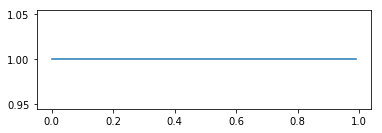

1
Heads on flip 1
['Prior', 1]


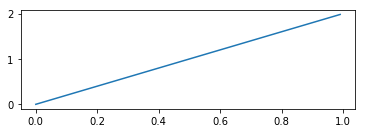

1
Heads on flip 2
['Prior', 1, 1]


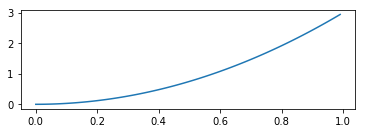

0
Tails on flip 3
['Prior', 1, 1, 0]


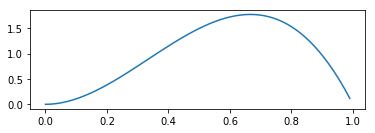

0
Tails on flip 4
['Prior', 1, 1, 0, 0]


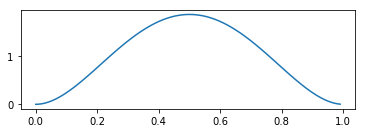

0
Tails on flip 5
['Prior', 1, 1, 0, 0, 0]


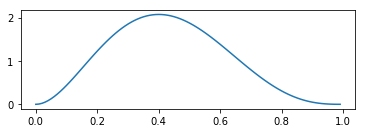

0
Tails on flip 6
['Prior', 1, 1, 0, 0, 0, 0]


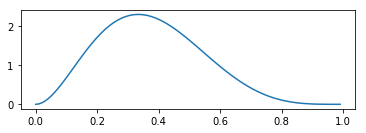

1
Heads on flip 7
['Prior', 1, 1, 0, 0, 0, 0, 1]


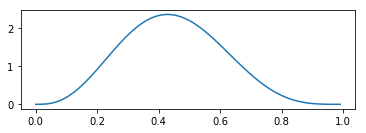

0
Tails on flip 8
['Prior', 1, 1, 0, 0, 0, 0, 1, 0]


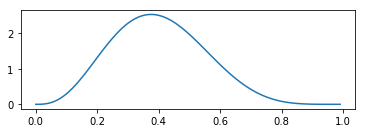

0
Tails on flip 9
['Prior', 1, 1, 0, 0, 0, 0, 1, 0, 0]


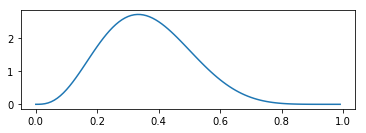

0
Tails on flip 10
['Prior', 1, 1, 0, 0, 0, 0, 1, 0, 0, 0]


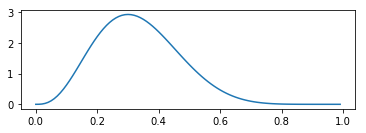

In [7]:
def h(index):

    if index==0:
        return lambda x: 1+0*x # for Uniform prior lambda x: np.exp(-(x-0.5)**2)/ quad(shift) 

    else:
        return lambda x: (x*data[index] + (x-1)*(data[index]-1)) * h(index -1)(x)       # Remove these with sum(data). 

def pdf(index):
    return lambda x: h(index)(x) / quad(h(index), 0, 1)[0]

n=int(input("How many flips altogether? "))
data = ["Prior"]
for i in range(n+1):

    if i==0:
        print (data[0])
    else:
        data.append(int(input()))    
        if data[i]==1:
            print ("Heads on flip %r" %(i)) 
        else:
            print ("Tails on flip %r" %(i))
    print (data)
    g(pdf(i))

### Simulation 2: User chooses parameter then random outcomes determine sequence of updated pdfs.
Generally the mode will converge to the parameter; this may not be obvious at only 10 trials.

What is prob(Heads)? 0.25
['Prior', 0, 0, 0, 0, 1, 0, 0, 1, 0, 0]
Tails


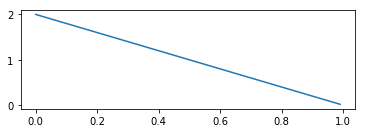

Tails


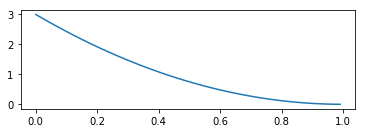

Tails


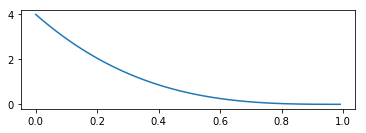

Tails


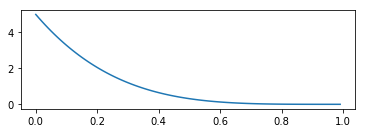

Heads


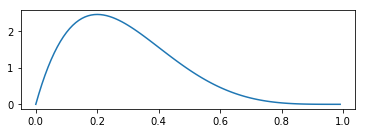

Tails


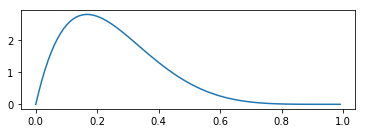

Tails


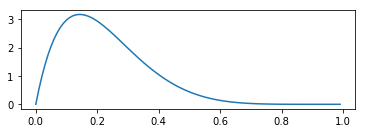

Heads


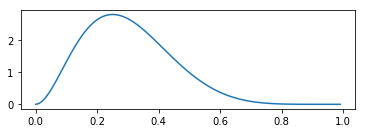

Tails


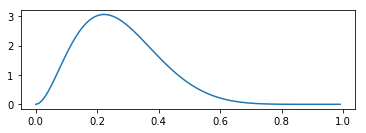

In [5]:
n, p, trials = 1, float(input("What is prob(Heads)? ")), 10
data = np.random.binomial(n, p, trials)
data = list(data)
# Front append "Prior" to data
data.reverse()
data.append("Prior")
data.reverse()

print (data)
 
def h(index):

    if index==0:
        return lambda x: 1+0*x

    else:
        return lambda x: (x*data[index] + (x-1)*(data[index]-1)) * h(index -1)(x)        

def pdf(index):
    return lambda x: h(index)(x) / quad(h(index), 0, 1)[0]

for i in range(1,10):
    if data[i]==1:
        print ("Heads") 
    else:
        print ("Tails")
    g(pdf(i))